In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_class = pd.read_csv("classData.csv")
df_detect = pd.read_csv("detect_dataset.csv")
df_class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [5]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [6]:
df_class.shape

(7861, 10)

In [7]:

df_class['Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')

df_class['Type'][df_class['Type'] == '0000' ] = 'NO Fault'
df_class['Type'][df_class['Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Type'][df_class['Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Type'][df_class['Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Type'][df_class['Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Type'][df_class['Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'
df_class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [8]:
df_class['Type'].value_counts(ascending=False)

Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

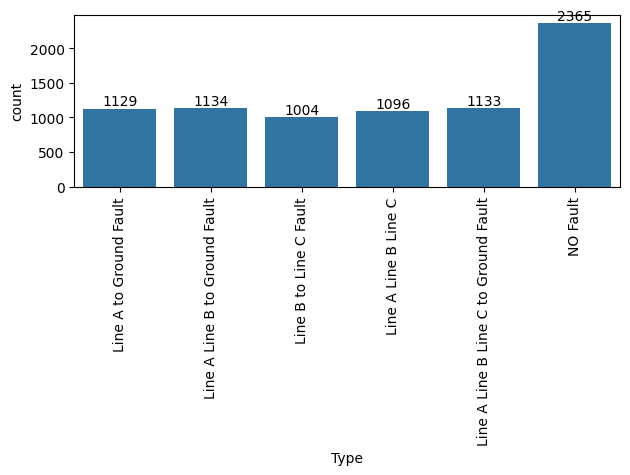

In [9]:
axis=sns.countplot(x='Type', data=df_class)
axis.bar_label(axis.containers[0])
plt.xticks(rotation=90)
plt.tight_layout()

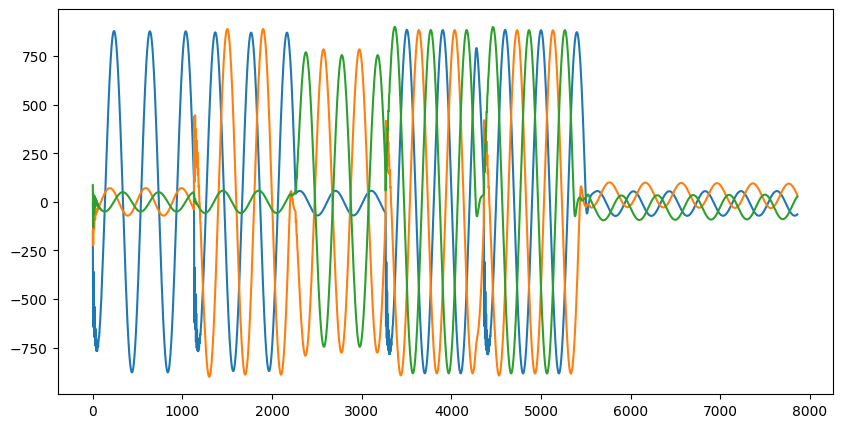

In [10]:
plt.figure(figsize = (10,5))
plt.plot(df_class["Ia"])
plt.plot(df_class["Ib"])
plt.plot(df_class["Ic"]);

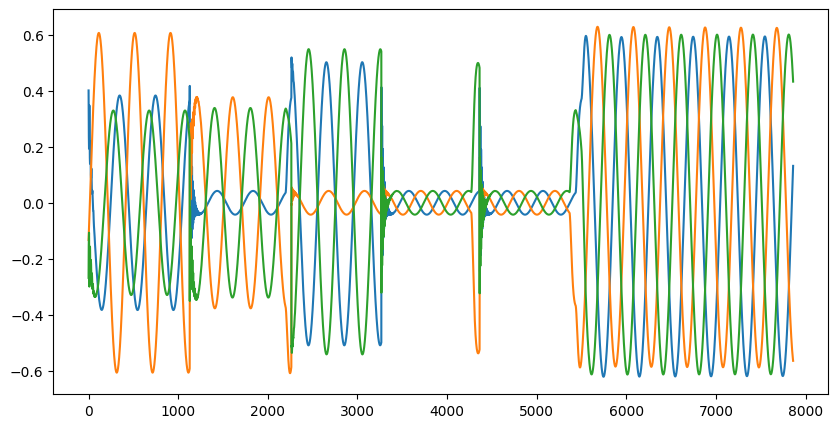

In [11]:
plt.figure(figsize = (10,5))
plt.plot(df_class["Va"])
plt.plot(df_class["Vb"])
plt.plot(df_class["Vc"]);

Model Building

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
le = LabelEncoder()
df_class["Type"]=le.fit_transform(df_class["Type"])
df_class.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [14]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Line A Line B Line C': 0, 'Line A Line B Line C to Ground Fault': 1, 'Line A Line B to Ground Fault': 2, 'Line A to Ground Fault': 3, 'Line B to Line C Fault': 4, 'NO Fault': 5}


In [15]:
X = df_class.drop(['Type','G','C','B','A'],axis=1)
y = df_class[['Type','G','C','B','A']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=45)

XGB Regressor

In [16]:
#! pip install sklearn.multioutput
#sklearn.ensemble.GradientBoostingClassifier

In [17]:
import xgboost as Xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize a multi-output classifier with a base classifier (RandomForestClassifier in this case)
classifier = Xgb.XGBClassifier()

# Create a MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(classifier, n_jobs=-1)

# Fit the model
multi_output_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_output_classifier.predict(X_test)

# Evaluate the model's performance
model_score = multi_output_classifier.score(X_test, y_test)
print(f"Model Score: {model_score}")



Model Score: 0.7940241576605213


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 6288, number of used features: 10
[LightGBM] [Info] Start training from score -1.980207
[LightGBM] [Info] Start training from score -1.926382
[LightGBM] [Info] Start training from score -1.935154
[LightGBM] [Info] Start training from score -1.945115
[LightGBM] [Info] Start training from score -2.056799
[LightGBM] [Info] Start training from score -1.200480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

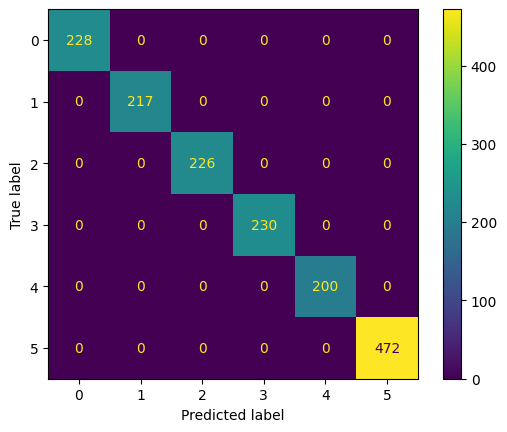

In [20]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

X = df_class.drop(['Type'],axis=1)
y = df_class[['Type']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=45)

RAND_VAL=10
num_folds=5 ## Number of folds
n_est=50 ## Number of estimators
lgbParams = {'n_estimators': n_est,
 'max_depth': 23,
 'learning_rate': 0.05,
 'min_child_weight': 1.4,
 'min_child_samples': 188,
 'subsample': 0.72,
 'subsample_freq': 2,
 'colsample_bytree': 0.42,
 'random_state': RAND_VAL,
 'num_leaves': 19}


model = lgb.LGBMClassifier(**lgbParams)
    
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[
        early_stopping(50, verbose=False),
        log_evaluation(5000),
        ]
    )

y_pred = model.predict(X_test)
model.score(X_train, y_train)

xgb_train = round(model.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# ConfusionMatrixDisplay(model, X_test, y_test);
# plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %


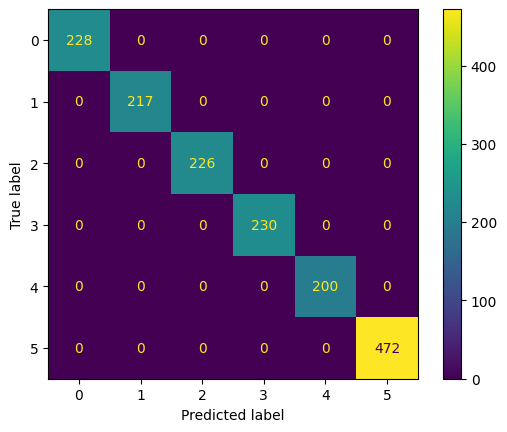

In [21]:
import xgboost as Xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

model = Xgb.XGBClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
model.score(X_train, y_train)

xgb_train = round(model.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# ConfusionMatrixDisplay(model, X_test, y_test);
# plt.title('Confusion Matrix');